<a href="https://colab.research.google.com/github/hecshzye/object-detection-tfjs/blob/main/tfod_fabrik_model_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Realtime Detection using TensorFlow**

# Objective
  - To contruct a Deep Learning algorithm using TensorFlow and Transfer Learning to recognise the connector inside a machinery (🚘)
  - Build a web application where the TensorFlow Js model is running inference over the live webcam with at least 90% accuracy.

# **Tools**

  - TensorFlow Training Custom Object Detector API

    - https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html


  - Dataset labelled using LabelImg Graphical Image annotation

    - https://github.com/tzutalin/labelImg https://tzutalin.github.io/labelImg/

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
#!pip install tensorflow==2.7.0

In [2]:
import numpy as np
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import sklearn

In [3]:
#!pip install tensorflow-gpu 

  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.8.0 which is incompatible.
tensorflow-text 2.8.1 requires tensorflow<2.9,>=2.8.0, but you have tensorflow 2.7.0 which is incompatible.


In [3]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-bc42c5be-960a-9d1f-b0db-c71b7eb96f0b)


#### Clone TensorFlow Object Detection Models

In [4]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


#### From the TFOD Official Documentation, installing protobuf inside the TFOD research folder

In [5]:
cd /content/models/research

/content/models/research


Installing protobuf

In [6]:
!protoc object_detection/protos/*.proto --python_out=.

In [7]:
# Installing COCO API
!git clone https://github.com/cocodataset/cocoapi.git

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [8]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [9]:
!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-ind

In [10]:
cp -r pycocotools /content/models/research

### Install TensorFlow Object Detection API

In [11]:
cd ..

/content/models/research/cocoapi


In [12]:
cd ..

/content/models/research


### Install TFOD API

In [13]:
cp object_detection/packages/tf2/setup.py .

In [14]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1690985 sha256=9fbe678c860cf0621399b1ac6faa4ff79beed2d67a09e04bd8605f939a6f94bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-sfaemjzy/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [15]:
print(tf.__version__)

2.8.0


# Testing the TFOD API

In [16]:
!python object_detection/builders/model_builder_tf2_test.py    

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-16 19:20:22.876081: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0416 19:20:23.177116 140158634264448 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.45s
I0416 19:20:23.642224 140158634264448 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.45s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.64s
I0416 19:20:24.285825 140158634264448 test

In [19]:
 cd /content/fabrik_tfod_demo/pre-trained-models

/content/fabrik_tfod_demo/pre-trained-models


# Download pre-trained model

In [20]:
# Download the Pretrained Model (SSD_RESNET101_V1_FPN_640x640)
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-04-16 18:39:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.148.128, 2607:f8b0:4001:c54::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.148.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz.2’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   282MB/s    in 1.3s    

2022-04-16 18:39:07 (282 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz.2’ saved [386527459/386527459]



In [21]:
# Unzip the Pretrained Model
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


# Create TF Records 

In [22]:
cd /content/fabrik_tfod_demo

/content/fabrik_tfod_demo


Create Train & Test TF Records

In [23]:
# Create train data:
!python generate_tfrecord.py -x /content/fabrik_tfod_demo/images/train -l /content/fabrik_tfod_demo/annotations/label_map.pbtxt -o /content/fabrik_tfod_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/fabrik_tfod_demo/images/test -l /content/fabrik_tfod_demo/annotations/label_map.pbtxt -o /content/fabrik_tfod_demo/annotations/test.record

Successfully created the TFRecord file: /content/fabrik_tfod_demo/annotations/train.record
Successfully created the TFRecord file: /content/fabrik_tfod_demo/annotations/test.record


# Training the Model

Confirming GPU for training

In [24]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


#### Dependencies for errors

In [29]:
#!pip install tensorflow==2.7.0

     |████████████████████████████████| 489.6 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 37.0 MB/s 
     |████████████████████████████████| 463 kB 51.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [26]:
#pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.2.52
Uninstalling opencv-python-headless-4.5.2.52:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.2.52.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-8daa01ff.so.58.109.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-06a336f2.so.58.61.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-01d48d95.so.56.60.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-098682aa.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libpng15-c2ffaf3d.so.15.13.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libssl-f3db6a3b.so.1.1
    /usr/local/lib/python3.7/dist-package

In [27]:
#pip install opencv-python-headless==4.5.2.52

  Using cached opencv_python_headless-4.5.2.52-cp37-cp37m-manylinux2014_x86_64.whl (38.2 MB)


# TRAINING

In [26]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 37 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 8s (53.1 MB/s)
(Reading database ... 155455 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155433 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.0.5.39-1+cuda11.1) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...


In [ ]:
!python model_main_tf2.py --model_dir=/content/fabrik_tfod_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/fabrik_tfod_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

2022-04-16 18:49:14.419794: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0416 18:49:14.426408 139850530072448 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0416 18:49:14.431665 139850530072448 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0416 18:49:14.431836 139850530072448 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0416 18:49:14.601715 139850530072448 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment

# EXPORT THE TRAINED MODEL

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/fabrik_tfod_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/fabrik_tfod_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/fabrik_tfod_demo/exported_models/my_model

2022-04-15 20:20:20.836789: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0415 20:20:21.037116 139966896240512 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-04-15 20:20:45.505407: W ten

# RUNNING INFERENCE 

Loading model...Done! Took 31.55927062034607 seconds
Running inference for /content/fabrik_tfod_demo/images/train/rawimgages12.jpg... Done


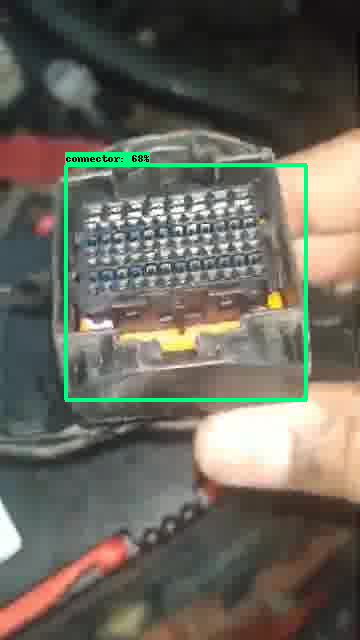

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/fabrik_tfod_demo/images/train/rawimgages12.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/fabrik_tfod_demo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/fabrik_tfod_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED
